# Module 3 Lab Exercise: Machine Learning Workflow and Types of Learning

## Learning Objectives
By the end of this lab, you will be able to:
- Distinguish between supervised, unsupervised, and reinforcement learning
- Understand the complete machine learning workflow
- Build and evaluate your first classification model
- Work with different types of data (numerical, categorical, text, images)
- Apply the end-to-end ML process: data → model → evaluation → insights

## Prerequisites
- Completed Module 2 (familiar with Python libraries and Jupyter/Colab)
- Understanding of basic data operations and visualization
- Access to your GitHub repository for saving work

---

## Part 1: Understanding Types of Machine Learning

Machine learning can be categorized into three main types. Let's explore each with practical examples.

### 1. Supervised Learning
**Definition**: Learning from labeled examples to make predictions on new, unseen data.

**Examples**:
- **Classification**: Predicting categories (spam/not spam, disease/healthy)
- **Regression**: Predicting continuous values (house prices, temperature)

**Key Characteristic**: We have both input features (X) and correct answers (y) during training.

### 2. Unsupervised Learning
**Definition**: Finding hidden patterns in data without labeled examples.

**Examples**:
- **Clustering**: Grouping similar customers for marketing
- **Dimensionality Reduction**: Simplifying complex data while keeping important information

**Key Characteristic**: We only have input features (X), no correct answers during training.

### 3. Reinforcement Learning
**Definition**: Learning through trial and error by receiving rewards or penalties.

**Examples**:
- Game playing (chess, Go)
- Autonomous vehicles
- Recommendation systems that learn from user feedback

**Key Characteristic**: Agent learns by interacting with an environment and receiving feedback.

**For this course, we'll focus primarily on supervised learning, with some unsupervised learning in later modules.**

## Part 2: Setting Up Our Machine Learning Environment

Let's start by importing our libraries and loading a dataset that will help us understand the ML workflow.

In [ ]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine, make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
plt.style.use('default')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")
print("🚀 Ready to start our machine learning journey!")

✅ All libraries imported successfully!
🚀 Ready to start our machine learning journey!


## Part 3: Loading and Exploring Our Dataset

We'll use the Wine dataset - a classic dataset for classification. It contains chemical analysis of wines from three different cultivars (types) grown in Italy.

In [ ]:
# Load the Wine dataset
wine_data = load_wine()

# Convert to DataFrame for easier handling
df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
df['wine_class'] = wine_data.target
df['wine_class_name'] = [wine_data.target_names[i] for i in wine_data.target]

print("Dataset Information:")
print(f"Shape: {df.shape}")
print(f"Features: {len(wine_data.feature_names)}")
print(f"Classes: {wine_data.target_names}")
print(f"\nFirst 5 rows:")
print(df.head())

Dataset Information:
Shape: (178, 15)
Features: 13
Classes: ['class_0' 'class_1' 'class_2']

First 5 rows:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39

In [ ]:
# Explore the dataset structure
print("Dataset Overview:")
print("=" * 50)
print(f"Total samples: {len(df)}")
print(f"Features (input variables): {len(df.columns) - 2}")  # -2 for target columns
print(f"Target classes: {df['wine_class_name'].unique()}")
print(f"\nClass distribution:")
print(df['wine_class_name'].value_counts())

# Check for missing values
print(f"\nMissing values: {df.isnull().sum().sum()}")
print("✅ No missing values - this is a clean dataset!")

Dataset Overview:
Total samples: 178
Features (input variables): 13
Target classes: [np.str_('class_0') np.str_('class_1') np.str_('class_2')]

Class distribution:
wine_class_name
class_1    71
class_0    59
class_2    48
Name: count, dtype: int64

Missing values: 0
✅ No missing values - this is a clean dataset!


## Part 4: Exploratory Data Analysis (EDA)

Before building models, we need to understand our data. This is a crucial step in the ML workflow.

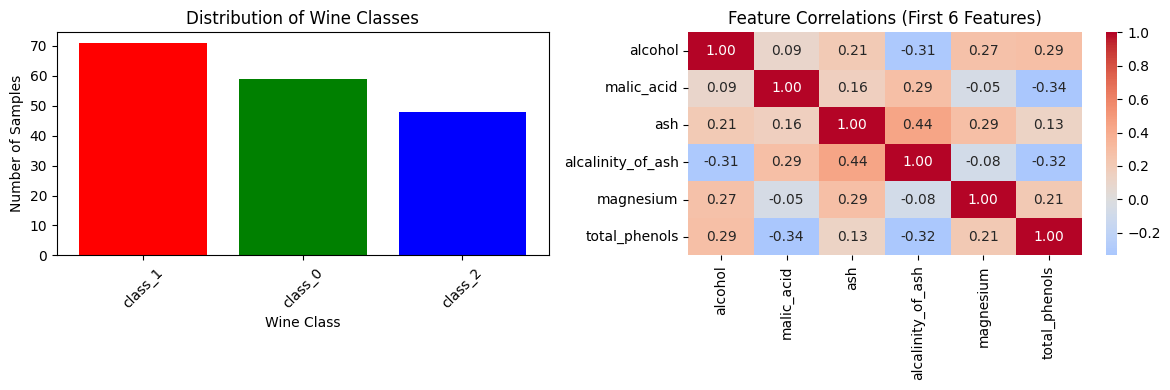

📊 EDA helps us understand:
- Class balance (are all classes equally represented?)
- Feature relationships (which features are correlated?)
- Data quality (any outliers or issues?)


In [ ]:
# Visualize class distribution
plt.figure(figsize=(12, 4))

# Subplot 1: Class distribution
plt.subplot(1, 2, 1)
class_counts = df['wine_class_name'].value_counts()
plt.bar(class_counts.index, class_counts.values, color=['red', 'green', 'blue'])
plt.title('Distribution of Wine Classes')
plt.xlabel('Wine Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)

# Subplot 2: Feature correlation heatmap (first 6 features for clarity)
plt.subplot(1, 2, 2)
correlation_matrix = df.iloc[:, :6].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlations (First 6 Features)')

plt.tight_layout()
plt.show()

print("📊 EDA helps us understand:")
print("- Class balance (are all classes equally represented?)")
print("- Feature relationships (which features are correlated?)")
print("- Data quality (any outliers or issues?)")

## Part 5: The Complete Machine Learning Workflow

Now let's implement the standard ML workflow step by step:

### The 6-Step ML Workflow:
1. **Data Preparation**: Clean and prepare the data
2. **Feature Selection**: Choose relevant input variables
3. **Data Splitting**: Separate training and testing data
4. **Model Training**: Teach the algorithm using training data
5. **Model Evaluation**: Test performance on unseen data
6. **Model Interpretation**: Understand what the model learned

Let's implement each step!

In [ ]:
# Step 1: Data Preparation
print("Step 1: Data Preparation")
print("=" * 30)

# Select features (X) and target (y)
# For simplicity, let's use the first 4 features
feature_names = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash']
X = df[feature_names]
y = df['wine_class']

print(f"Selected features: {feature_names}")
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Display first few rows
print("\nFirst 5 samples:")
print(X.head())

Step 1: Data Preparation
Selected features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash']
Feature matrix shape: (178, 4)
Target vector shape: (178,)

First 5 samples:
   alcohol  malic_acid   ash  alcalinity_of_ash
0    14.23        1.71  2.43               15.6
1    13.20        1.78  2.14               11.2
2    13.16        2.36  2.67               18.6
3    14.37        1.95  2.50               16.8
4    13.24        2.59  2.87               21.0


In [ ]:
# Step 2: Data Splitting
print("Step 2: Data Splitting")
print("=" * 30)

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% for testing
    random_state=42,    # For reproducible results
    stratify=y          # Maintain class proportions
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Training classes: {np.bincount(y_train)}")
print(f"Testing classes: {np.bincount(y_test)}")

print("\n🎯 Why split data?")
print("- Training set: Teach the model")
print("- Testing set: Evaluate performance on unseen data")
print("- This prevents overfitting (memorizing vs. learning)")

Step 2: Data Splitting
Training set: 142 samples
Testing set: 36 samples
Training classes: [47 57 38]
Testing classes: [12 14 10]

🎯 Why split data?
- Training set: Teach the model
- Testing set: Evaluate performance on unseen data
- This prevents overfitting (memorizing vs. learning)


In [ ]:
# Step 3: Model Training
print("Step 3: Model Training")
print("=" * 30)

# Create and train two different models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=3)
}

trained_models = {}

for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    model.fit(X_train, y_train)
    trained_models[name] = model

    print(f"✅ {name} training completed!")

print("\n🤖 What happened during training?")
print("- Models learned patterns from training data")
print("- They found relationships between features and wine classes")
print("- Now they can make predictions on new data!")

Step 3: Model Training

Training Logistic Regression...
✅ Logistic Regression training completed!

Training Decision Tree...
✅ Decision Tree training completed!

🤖 What happened during training?
- Models learned patterns from training data
- They found relationships between features and wine classes
- Now they can make predictions on new data!


In [ ]:
# Step 4: Model Evaluation
print("Step 4: Model Evaluation")
print("=" * 30)

results = {}

for name, model in trained_models.items():
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")

    # Detailed classification report
    print("\nDetailed Performance:")
    print(classification_report(y_test, y_pred, target_names=wine_data.target_names))

# Compare models
print("\n📊 Model Comparison:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.3f}")

best_model = max(results, key=results.get)
print(f"\n🏆 Best performing model: {best_model}")

Step 4: Model Evaluation

Logistic Regression Results:
Accuracy: 0.889 (88.9%)

Detailed Performance:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.81      0.93      0.87        14
     class_2       0.88      0.70      0.78        10

    accuracy                           0.89        36
   macro avg       0.90      0.88      0.88        36
weighted avg       0.89      0.89      0.89        36


Decision Tree Results:
Accuracy: 0.833 (83.3%)

Detailed Performance:
              precision    recall  f1-score   support

     class_0       0.86      1.00      0.92        12
     class_1       0.91      0.71      0.80        14
     class_2       0.73      0.80      0.76        10

    accuracy                           0.83        36
   macro avg       0.83      0.84      0.83        36
weighted avg       0.84      0.83      0.83        36


📊 Model Comparison:
Logistic Regression: 0.889
Decision Tree: 0.

Step 5: Model Interpretation


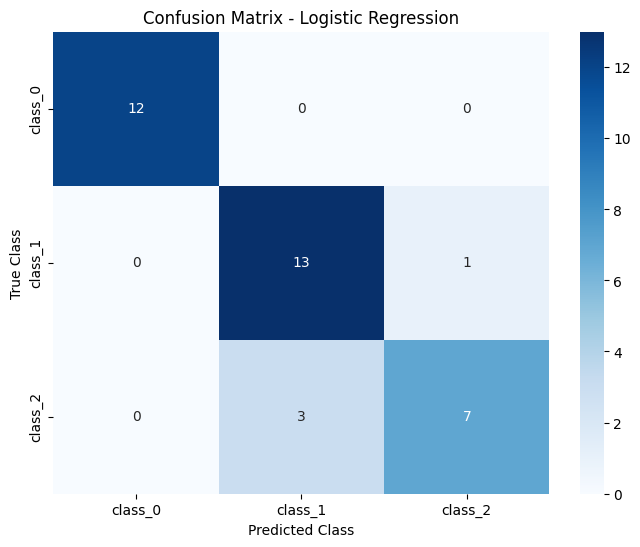


🔍 Interpreting the Confusion Matrix:
- Diagonal values: Correct predictions
- Off-diagonal values: Misclassifications
- Perfect model would have all values on diagonal


In [ ]:
# Step 5: Model Interpretation
print("Step 5: Model Interpretation")
print("=" * 30)

# Visualize confusion matrix for the best model
best_model_obj = trained_models[best_model]
y_pred_best = best_model_obj.predict(X_test)

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=wine_data.target_names,
            yticklabels=wine_data.target_names)
plt.title(f'Confusion Matrix - {best_model}')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

print(f"\n🔍 Interpreting the Confusion Matrix:")
print("- Diagonal values: Correct predictions")
print("- Off-diagonal values: Misclassifications")
print("- Perfect model would have all values on diagonal")

## Part 6: Understanding Different Data Types in ML

Machine learning works with various types of data. Let's explore the main categories:

In [ ]:
# Understanding Different Data Types in ML
print("Understanding Data Types in Machine Learning")
print("=" * 45)

# Create examples of different data types
data_examples = {
    'Numerical (Continuous)': [23.5, 45.2, 67.8, 12.1, 89.3],
    'Numerical (Discrete)': [1, 5, 3, 8, 2],
    'Categorical (Nominal)': ['Red', 'Blue', 'Green', 'Red', 'Blue'],
    'Categorical (Ordinal)': ['Low', 'Medium', 'High', 'Medium', 'Low'],
    'Text': ['Hello world', 'Machine learning', 'Data science', 'Python programming', 'AI revolution'],
    'Boolean': [True, False, True, True, False]
}

for data_type, examples in data_examples.items():
    print(f"\n{data_type}:")
    print(f"  Examples: {examples}")
    print(f"  Use case: ", end="")

    if 'Continuous' in data_type:
        print("Regression problems (predicting prices, temperatures)")
    elif 'Discrete' in data_type:
        print("Counting problems (number of items, ratings)")
    elif 'Nominal' in data_type:
        print("Classification without order (colors, categories)")
    elif 'Ordinal' in data_type:
        print("Classification with order (ratings, sizes)")
    elif 'Text' in data_type:
        print("Natural language processing (sentiment analysis, translation)")
    elif 'Boolean' in data_type:
        print("Binary classification (yes/no, spam/not spam)")

print("\n💡 Key Insight: Different data types require different preprocessing and algorithms!")

Understanding Data Types in Machine Learning

Numerical (Continuous):
  Examples: [23.5, 45.2, 67.8, 12.1, 89.3]
  Use case: Regression problems (predicting prices, temperatures)

Numerical (Discrete):
  Examples: [1, 5, 3, 8, 2]
  Use case: Counting problems (number of items, ratings)

Categorical (Nominal):
  Examples: ['Red', 'Blue', 'Green', 'Red', 'Blue']
  Use case: Classification without order (colors, categories)

Categorical (Ordinal):
  Examples: ['Low', 'Medium', 'High', 'Medium', 'Low']
  Use case: Classification with order (ratings, sizes)

Text:
  Examples: ['Hello world', 'Machine learning', 'Data science', 'Python programming', 'AI revolution']
  Use case: Natural language processing (sentiment analysis, translation)

Boolean:
  Examples: [True, False, True, True, False]
  Use case: Binary classification (yes/no, spam/not spam)

💡 Key Insight: Different data types require different preprocessing and algorithms!


## Part 7: Hands-On Practice - Build Your Own Model

Now it's your turn! Complete the following tasks to reinforce your learning.

In [ ]:
# Task 1: Try different features
print("Task 1: Experiment with Different Features")
print("=" * 40)

# Your task: Select 3 different features and build a model
# Available features:
print("Available features:")
for i, feature in enumerate(wine_data.feature_names):
    print(f"{i+1:2d}. {feature}")

# TODO: Replace these with your chosen features
your_features = ['alcohol', 'color_intensity', 'proline']  # Modify this list

# Build model with your features
X_your = df[your_features]
X_train_your, X_test_your, y_train_your, y_test_your = train_test_split(
    X_your, y, test_size=0.2, random_state=42, stratify=y
)

# Train a logistic regression model
your_model = LogisticRegression(random_state=42)
your_model.fit(X_train_your, y_train_your)

# Evaluate
y_pred_your = your_model.predict(X_test_your)
your_accuracy = accuracy_score(y_test_your, y_pred_your)

print(f"\nYour model features: {your_features}")
print(f"Your model accuracy: {your_accuracy:.3f} ({your_accuracy*100:.1f}%)")

# Compare with original model
print(f"Original model accuracy: {results['Logistic Regression']:.3f}")
if your_accuracy > results['Logistic Regression']:
    print("🎉 Great job! Your feature selection improved the model!")
else:
    print("🤔 Try different features to see if you can improve performance!")

Task 1: Experiment with Different Features
Available features:
 1. alcohol
 2. malic_acid
 3. ash
 4. alcalinity_of_ash
 5. magnesium
 6. total_phenols
 7. flavanoids
 8. nonflavanoid_phenols
 9. proanthocyanins
10. color_intensity
11. hue
12. od280/od315_of_diluted_wines
13. proline

Your model features: ['alcohol', 'color_intensity', 'proline']
Your model accuracy: 0.833 (83.3%)
Original model accuracy: 0.889
🤔 Try different features to see if you can improve performance!


## Part 8: Assessment - Understanding ML Concepts

Answer the following questions to demonstrate your understanding:

In [ ]:
# Assessment Task 1: Identify the ML type
print("Assessment Task 1: Identify Machine Learning Types")
print("=" * 50)

# For each scenario, identify if it's Supervised, Unsupervised, or Reinforcement Learning

scenarios = [
    "Predicting house prices based on size, location, and age",
    "Grouping customers by purchasing behavior without knowing groups beforehand",
    "Teaching a robot to play chess by playing many games",
    "Classifying emails as spam or not spam using labeled examples",
    "Finding hidden topics in news articles without predefined categories"
]

# Your answers (replace 'TYPE' with Supervised, Unsupervised, or Reinforcement)
your_answers = [
    "Supervised",      # Scenario 1
    "Unsupervised",    # Scenario 2
    "Reinforcement",   # Scenario 3
    "Supervised",      # Scenario 4
    "Unsupervised"     # Scenario 5
]

# Check answers
correct_answers = ["Supervised", "Unsupervised", "Reinforcement", "Supervised", "Unsupervised"]

print("Scenario Analysis:")
score = 0
for i, (scenario, your_answer, correct) in enumerate(zip(scenarios, your_answers, correct_answers)):
    is_correct = your_answer == correct
    score += is_correct
    status = "✅" if is_correct else "❌"
    print(f"{status} {i+1}. {scenario}")
    print(f"   Your answer: {your_answer} | Correct: {correct}")
    print()

print(f"Score: {score}/{len(scenarios)} ({score/len(scenarios)*100:.0f}%)")

Assessment Task 1: Identify Machine Learning Types
Scenario Analysis:
✅ 1. Predicting house prices based on size, location, and age
   Your answer: Supervised | Correct: Supervised

✅ 2. Grouping customers by purchasing behavior without knowing groups beforehand
   Your answer: Unsupervised | Correct: Unsupervised

✅ 3. Teaching a robot to play chess by playing many games
   Your answer: Reinforcement | Correct: Reinforcement

✅ 4. Classifying emails as spam or not spam using labeled examples
   Your answer: Supervised | Correct: Supervised

✅ 5. Finding hidden topics in news articles without predefined categories
   Your answer: Unsupervised | Correct: Unsupervised

Score: 5/5 (100%)


## Part 9: Real-World Applications and Case Studies

Let's explore how the concepts we've learned apply to real-world scenarios.

### Case Study 1: Recommendation Systems (Netflix, Amazon)
**Problem**: Suggest movies/products users might like
**ML Type**: Hybrid (Supervised + Unsupervised + Reinforcement)
**Data**: User ratings, viewing history, product features
**Workflow**: Collect data → Build user profiles → Train models → Make recommendations → Learn from feedback

### Case Study 2: Fraud Detection (Banks, Credit Cards)
**Problem**: Identify fraudulent transactions
**ML Type**: Supervised Learning (Classification)
**Data**: Transaction amounts, locations, times, merchant types
**Workflow**: Historical fraud data → Feature engineering → Train classifier → Real-time scoring → Continuous monitoring

### Case Study 3: Medical Diagnosis (Healthcare)
**Problem**: Assist doctors in diagnosing diseases
**ML Type**: Supervised Learning (Classification)
**Data**: Medical images, patient symptoms, lab results
**Workflow**: Labeled medical data → Image processing → Train deep learning models → Clinical validation → Deployment with human oversight

### Your Turn: Think of Applications
Consider these industries and think about how ML could be applied:
- **Transportation**: Autonomous vehicles, route optimization
- **Agriculture**: Crop monitoring, yield prediction
- **Education**: Personalized learning, automated grading
- **Entertainment**: Content creation, game AI

## Part 10: Complete ML Workflow Summary

Let's summarize the complete machine learning workflow we've learned:

### 🔄 The Machine Learning Lifecycle

```
1. Problem Definition
   ↓
2. Data Collection & Exploration
   ↓
3. Data Preprocessing & Feature Engineering
   ↓
4. Model Selection & Training
   ↓
5. Model Evaluation & Validation
   ↓
6. Model Deployment & Monitoring
   ↓
7. Continuous Improvement
```

### 📋 Checklist for Every ML Project:

**Data Phase:**
- [ ] Understand the problem and define success metrics
- [ ] Collect and explore the dataset
- [ ] Check for missing values, outliers, and data quality issues
- [ ] Visualize data to understand patterns and relationships

**Modeling Phase:**
- [ ] Split data into training and testing sets
- [ ] Select appropriate algorithms for the problem type
- [ ] Train multiple models and compare performance
- [ ] Evaluate using appropriate metrics (accuracy, precision, recall, etc.)

**Deployment Phase:**
- [ ] Validate model performance on new data
- [ ] Document the model and its limitations
- [ ] Deploy responsibly with monitoring systems
- [ ] Plan for model updates and maintenance

### 🎯 Key Takeaways:
1. **Start Simple**: Begin with basic models before trying complex ones
2. **Understand Your Data**: EDA is crucial for success
3. **Validate Properly**: Always test on unseen data
4. **Iterate**: ML is an iterative process of improvement
5. **Document Everything**: Keep track of experiments and results

## Your Reflection and Analysis

**Instructions**: Complete the reflection below by editing this markdown cell.

### My Understanding of Machine Learning Types

**Supervised Learning**: Supervised Learning is where you give the computer examples that already have the right answers. You're teaching it by giving it input to give it an understanding what it should be looking for. Then, it predicts answers for other things you show it.

**Unsupervised Learning**: Unsupervised learning is when you give it a bunch of data and without telling it anything, it searches for patterns and groups on its own.

**Reinforcement Learning**: Reinforfcement learning is when you put an agent into an environment where it does random things and if it does something good, it's rewarded. It continues to be rewarded as long as the outcomes are positive.

### My Analysis of the Wine Classification Project

**Best performing model**: Logistic regression

**Why do you think this model performed better?**: Logistic regression is better with linear data whereas decision tree is better with complex data. Logistic could have performed better by interpreting the pattern more quickly and decision tree could have overfitted too much which led to inaccuracies.

**What would you try next to improve performance?**: Try more models, features, or change the data points.

### Real-World Application Ideas

**Industry of Interest**: Healthcare

**ML Problem**: Using someone's medical data to predict the progression or relapse of multiple sclerosis in patients.

**Type of ML**: Supervised

**Data Needed**: Patient records including: MRI's, symptoms, lab testing, medication history, demographics.

### Key Learnings

**Most important concept learned**: The machine learning lifecycle:  1. Define problem 2.  Collect Data and look for patterns and anomalies 3. Fill in blanks for data (clean data) and create attributes/features to help model 4. Choose model and train it using the collected data 5. Test model with new data and verify with parameters 6. Put trained model in real environment and supervise performance 7. As more data and information comes in, update model as needed to improve accuracy.

**Most challenging part**: The most challenging part of this module was understanding what the models are actually doing in the background. To train a model is one thing but learning how it makes a decision and why is where I'm not understanding completely.

**Questions for further exploration**: How can I understand and interpret complex models and how/why they make predicitions?
How can I definitively choose the model that's right for my circumstance?
How can I determine if I need multiple models or just one?

## Lab Summary and Next Steps

### 🎯 What You've Accomplished:
✅ **Understood ML Types**: Supervised, Unsupervised, and Reinforcement Learning  
✅ **Mastered ML Workflow**: Data → Model → Evaluation → Insights  
✅ **Built Classification Models**: Logistic Regression and Decision Trees  
✅ **Evaluated Model Performance**: Accuracy, Confusion Matrix, Classification Report  
✅ **Worked with Real Data**: Wine dataset analysis and modeling  
✅ **Applied Best Practices**: Data splitting, model comparison, interpretation  

### 🚀 Preparation for Module 4:
In the next lab, you'll dive deeper into:
- **Exploratory Data Analysis (EDA)**: Advanced visualization techniques
- **Data Quality Assessment**: Handling missing values, outliers, and duplicates
- **Statistical Analysis**: Understanding distributions and relationships
- **Data Storytelling**: Communicating insights effectively

### 📝 Action Items:
1. **Upload this notebook** to your GitHub repository
2. **Experiment** with different features in the wine dataset
3. **Try other datasets** from sklearn.datasets (digits, breast_cancer, boston)
4. **Practice** the 6-step ML workflow on a new problem
5. **Document** your experiments and findings

### 🔗 Additional Resources:
- [Scikit-learn User Guide](https://scikit-learn.org/stable/user_guide.html)
- [Machine Learning Mastery](https://machinelearningmastery.com/)
- [Kaggle Learn](https://www.kaggle.com/learn) - Free micro-courses
- [Google's Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course)

### 💭 Reflection Questions:
1. Which type of machine learning (supervised/unsupervised/reinforcement) interests you most and why?
2. What was the most challenging part of the ML workflow for you?
3. How might you apply these concepts to a problem in your field of interest?
4. What questions do you have about machine learning that you'd like to explore further?

**Congratulations on completing Module 3! You've taken a significant step in your machine learning journey.** 🎉

---

*Remember: Machine learning is a skill that improves with practice. Keep experimenting, stay curious, and don't be afraid to make mistakes - they're part of the learning process!*